# Data Loading, Storage and File Formats 
Problem Statement: Analyzing Sales Data from Multiple File Formats 
Dataset: Sales data in multiple file formats (e.g., CSV, Excel, JSON) 
Description: The goal is to load and analyze sales data from different file formats, including 
CSV, Excel, and JSON, and perform data cleaning, transformation, and analysis on the 
dataset. 
  
Tasks to Perform: 
 Obtain sales data files in various formats, such as CSV, Excel, and JSON. 
1. Load the sales data from each file format into the appropriate data structures or 
dataframes. 
2. Explore the structure and content of the loaded data, identifying any inconsistencies, 
missing values, or data quality issues. 
3. Perform data cleaning operations, such as handling missing values, removing 
duplicates, or correcting inconsistencies. 
4. Convert the data into a unified format, such as a common dataframe or data structure, 
to enable seamless analysis.
5. Perform data transformation tasks, such as merging multiple datasets, splitting 
columns, or deriving new variables. 
6. Analyze the sales data by performing descriptive statistics, aggregating data by 
specific variables, or calculating metrics such as total sales, average order value, or 
product category distribution. 
7. Create visualizations, such as bar plots, pie charts, or box plots, to represent the sales 
data and gain insights into sales trends, customer behavior, or product performance. eamless analysis.

- Import necessary libraries

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

- Task 1: Load the sales data from each file format

In [42]:
# Load CSV file
df_csv = pd.read_csv('sales_data.csv', encoding='ISO-8859-1')

# Load Excel file
df_excel = pd.read_excel('sales_data.xls')

# Load JSON file
df_json = pd.read_json('sales_data.json')

- Task 2: Explore the structure and content of the loaded data

In [43]:
print("CSV Data:")
print(df_csv.head())
print(df_csv.info())

print("\nExcel Data:")
print(df_excel.head())
print(df_excel.info())

print("\nJSON Data:")
print(df_json.head())
print(df_json.info())
print(df_json.columns)

CSV Data:
   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Abbaye    

- Task 3: Data cleaning operations

In [44]:
# Forward fill for missing values in the CSV data
df_csv.ffill(inplace=True)  # Using the recommended method

# Remove duplicates in Excel data
df_excel.drop_duplicates(inplace=True)

# Drop rows with missing values in 'Quantity' (or any relevant column) in JSON data
df_json.dropna(subset=['Quantity'], inplace=True)  # Adjust the column name if necessary


In [45]:
print("CSV DataFrame after cleaning:")
print(df_csv.head())

print("Excel DataFrame after cleaning:")
print(df_excel.head())

print("JSON DataFrame after cleaning:")
print(df_json.head())


CSV DataFrame after cleaning:
   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59

- Task 4: Convert data into a unified format

In [46]:
# Concatenate all dataframes into a single dataframe
df_combined = pd.concat([df_csv, df_excel, df_json], ignore_index=True)
print(df_combined.columns)

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE', 'Row ID', 'Order ID', 'Order Date', 'Ship Date',
       'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country',
       'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'SaleId', 'OrderId', 'ProductId'],
      dtype='object')


- Task 5: Data transformation

In [47]:
# Deriving a new variable for total sales
df_combined['Total Sales'] = df_combined['QUANTITYORDERED'] * df_combined['PRICEEACH']
# Check the original DataFrame
print(df_combined.head())

# Check if the Total Sales column exists and is calculated correctly
print(df_combined[['Total Sales']].head())

   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0      10107.0             30.0      95.70              2.0  2871.00   
1      10121.0             34.0      81.35              5.0  2765.90   
2      10134.0             41.0      94.74              2.0  3884.34   
3      10145.0             45.0      83.26              6.0  3746.70   
4      10159.0             49.0     100.00             14.0  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ... Sub-Category  \
0   2/24/2003 0:00  Shipped     1.0       2.0   2003.0  ...          NaN   
1    5/7/2003 0:00  Shipped     2.0       5.0   2003.0  ...          NaN   
2    7/1/2003 0:00  Shipped     3.0       7.0   2003.0  ...          NaN   
3   8/25/2003 0:00  Shipped     3.0       8.0   2003.0  ...          NaN   
4  10/10/2003 0:00  Shipped     4.0      10.0   2003.0  ...          NaN   

   Product Name Sales Quantity Discount Profit SaleId OrderId ProductId  \
0           NaN   NaN      NaN     

In [48]:
print(sales_by_category.isnull().sum())

Category       0
Total Sales    0
dtype: int64


- Task 6: Analyze the sales data

In [49]:
# Descriptive statistics
print("\nDescriptive Statistics:")
print(df_combined.describe())


Descriptive Statistics:
        ORDERNUMBER  QUANTITYORDERED    PRICEEACH  ORDERLINENUMBER  \
count   2823.000000      2823.000000  2823.000000      2823.000000   
mean   10258.725115        35.092809    83.658544         6.466171   
min    10100.000000         6.000000    26.880000         1.000000   
25%    10180.000000        27.000000    68.860000         3.000000   
50%    10262.000000        35.000000    95.700000         6.000000   
75%    10333.500000        43.000000   100.000000         9.000000   
max    10425.000000        97.000000   100.000000        18.000000   
std       92.085478         9.741443    20.174277         4.225841   

              SALES       QTR_ID     MONTH_ID     YEAR_ID         MSRP  \
count   2823.000000  2823.000000  2823.000000  2823.00000  2823.000000   
mean    3553.889072     2.717676     7.092455  2003.81509   100.715551   
min      482.130000     1.000000     1.000000  2003.00000    33.000000   
25%     2203.430000     2.000000     4.000000  2

- Task 6: Analyze the sales data

In [50]:
# Descriptive statistics
print("\nDescriptive Statistics:")
print(df_combined.describe())

# Make sure 'Total Sales' column exists and is correctly calculated
df_combined['Total Sales'] = df_combined['Quantity'] * df_combined['Sales']

# Then aggregate by category
sales_by_category = df_combined.groupby('Category')['Total Sales'].sum().reset_index()


# Display the aggregated sales by category
print("\nSales by Category:")
print(sales_by_category)


Descriptive Statistics:
        ORDERNUMBER  QUANTITYORDERED    PRICEEACH  ORDERLINENUMBER  \
count   2823.000000      2823.000000  2823.000000      2823.000000   
mean   10258.725115        35.092809    83.658544         6.466171   
min    10100.000000         6.000000    26.880000         1.000000   
25%    10180.000000        27.000000    68.860000         3.000000   
50%    10262.000000        35.000000    95.700000         6.000000   
75%    10333.500000        43.000000   100.000000         9.000000   
max    10425.000000        97.000000   100.000000        18.000000   
std       92.085478         9.741443    20.174277         4.225841   

              SALES       QTR_ID     MONTH_ID     YEAR_ID         MSRP  \
count   2823.000000  2823.000000  2823.000000  2823.00000  2823.000000   
mean    3553.889072     2.717676     7.092455  2003.81509   100.715551   
min      482.130000     1.000000     1.000000  2003.00000    33.000000   
25%     2203.430000     2.000000     4.000000  2

C:\Users\Aditi\AppData\Local\Temp\ipykernel_14696\4263910469.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_by_category, x='Category', y='Total Sales', palette='viridis')


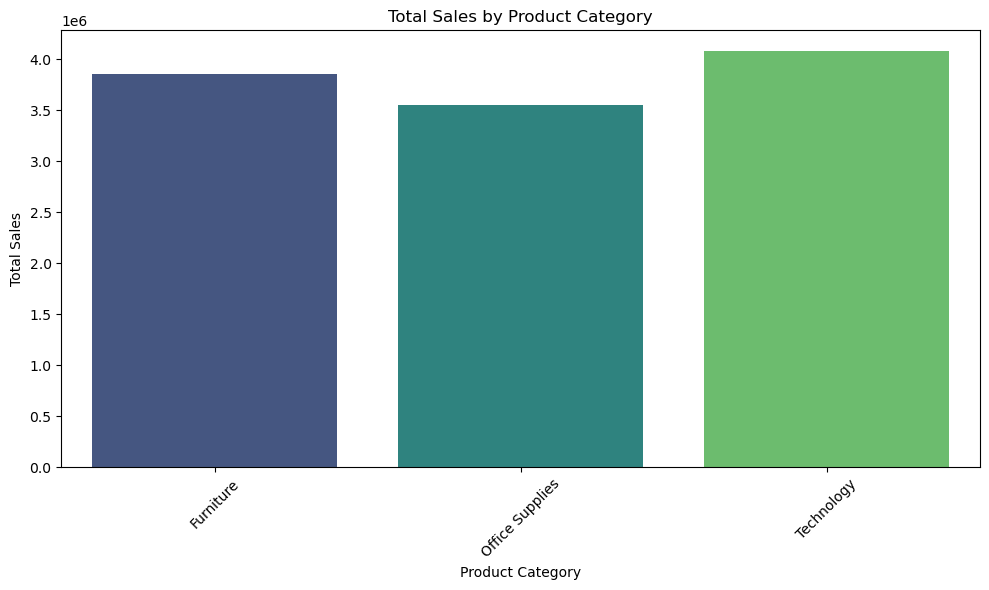

In [51]:
plt.figure(figsize=(10, 6))
sns.barplot(data=sales_by_category, x='Category', y='Total Sales', palette='viridis')
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


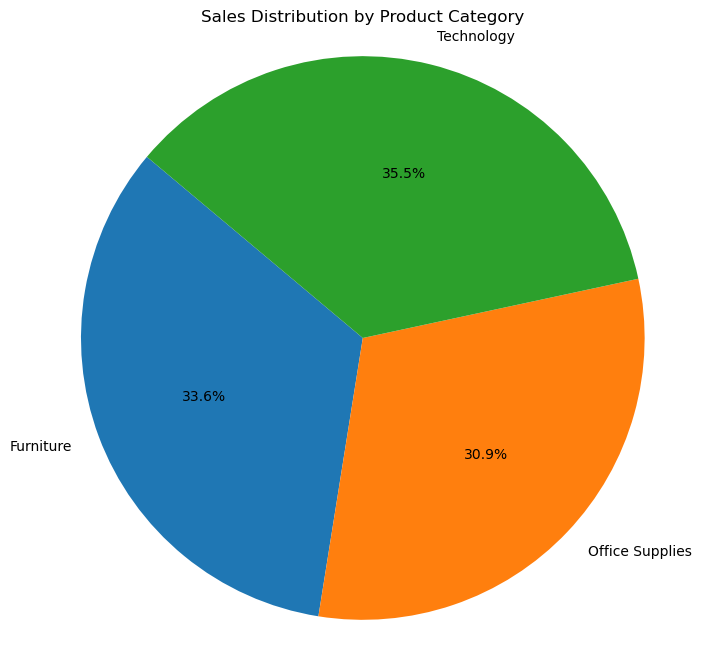

In [52]:
# Pie chart for sales distribution
plt.figure(figsize=(8, 8))
plt.pie(sales_by_category['Total Sales'], labels=sales_by_category['Category'], autopct='%1.1f%%', startangle=140)
plt.title('Sales Distribution by Product Category')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()
